# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Gayoung Ko 
**Dataset:** Heart Disease  
**Date:** October 8th, 2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


Installing the ucimlrepo package to import dataset

In [29]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


#combining x and y into one dataset
df = pd.concat([X, y], axis=1)

df.head()



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 2. Exploratory Data Analysis (EDA)

Exploring dataset to understand its structure and identify patterns.


In [31]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (303, 14)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


=== TARGET VARIABLE ===
Target distribution:
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


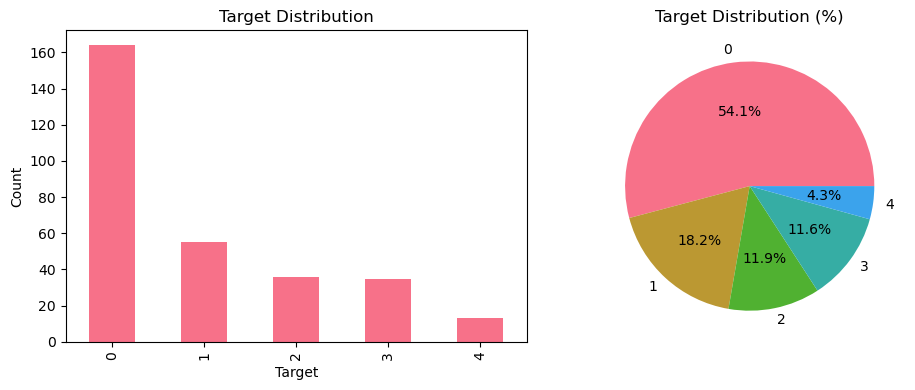

In [32]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['num'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()


The dataset uses values from 0 to 4 to represent the severity levels of the diagnosis of heart disease. This dataset shows that 54.1 percent of the population falls into the 0 category, meaning they do not have heart disease. The rest of the population has varying levels of disease from 1 to 4 which indicates the severity of the condition.

=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


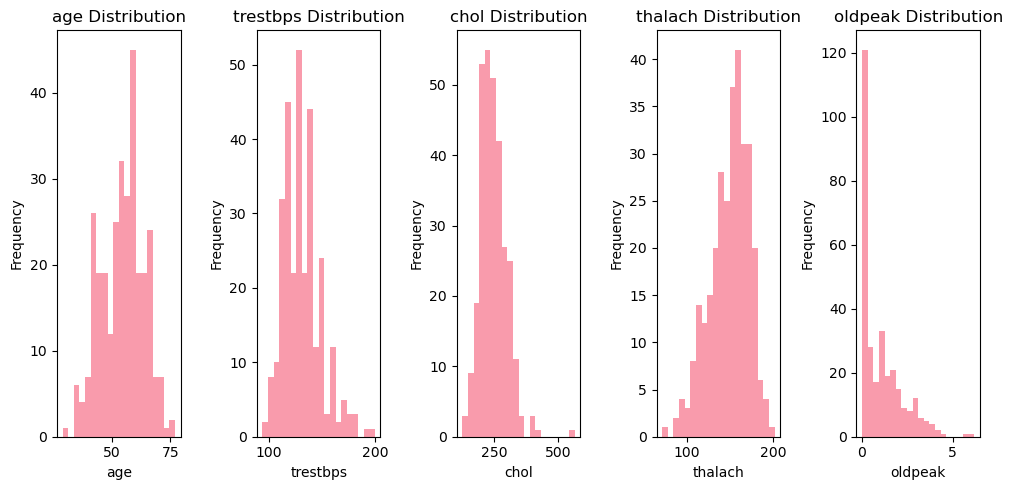

In [33]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
axes = axes.flatten()  

if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()




=== CATEGORICAL VARIABLES ===
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num']

sex value counts:
1    206
0     97
Name: sex, dtype: int64


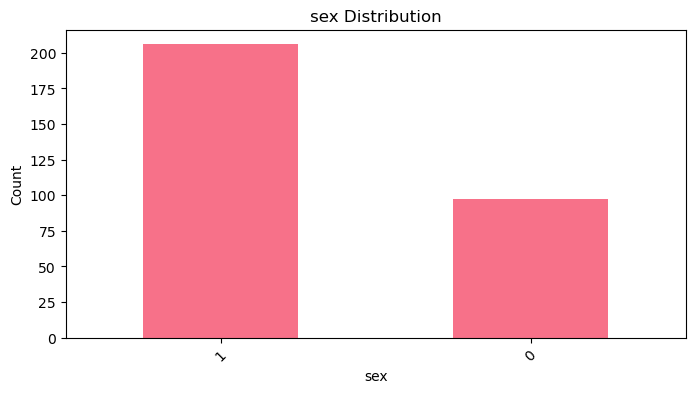


cp value counts:
4    144
3     86
2     50
1     23
Name: cp, dtype: int64


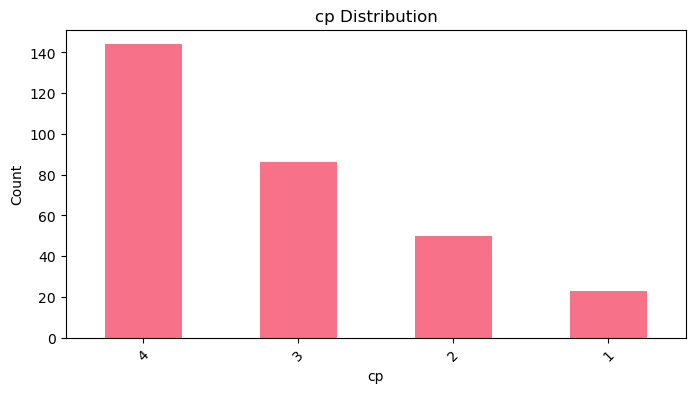


fbs value counts:
0    258
1     45
Name: fbs, dtype: int64


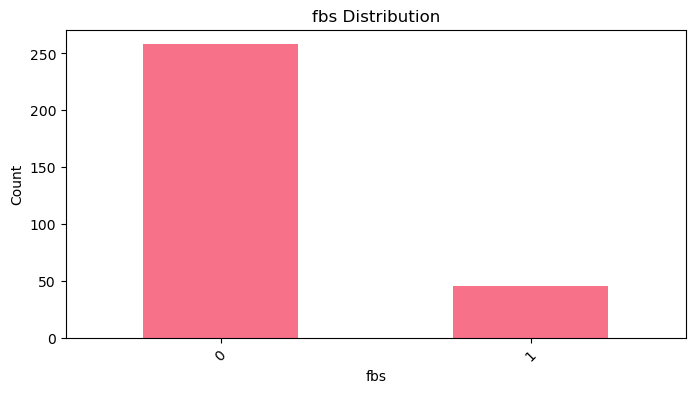


restecg value counts:
0    151
2    148
1      4
Name: restecg, dtype: int64


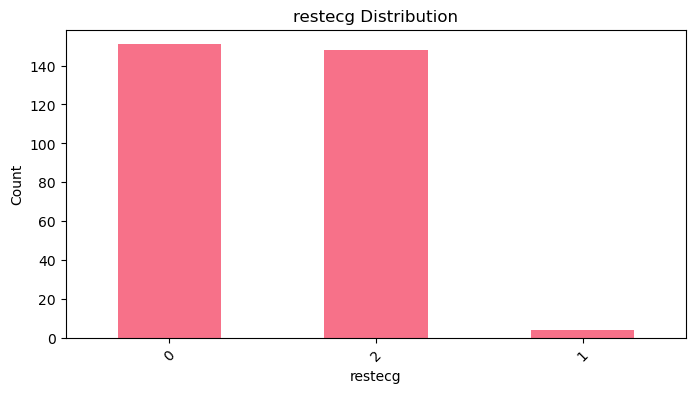


exang value counts:
0    204
1     99
Name: exang, dtype: int64


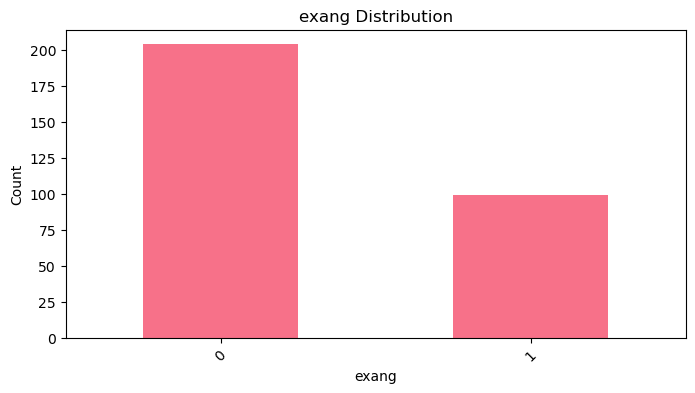


slope value counts:
1    142
2    140
3     21
Name: slope, dtype: int64


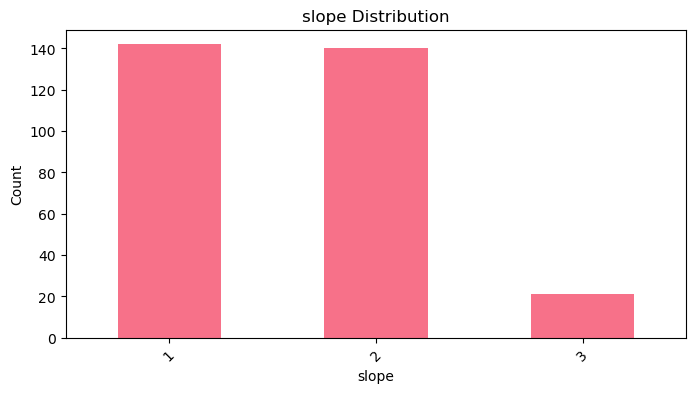


thal value counts:
3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64


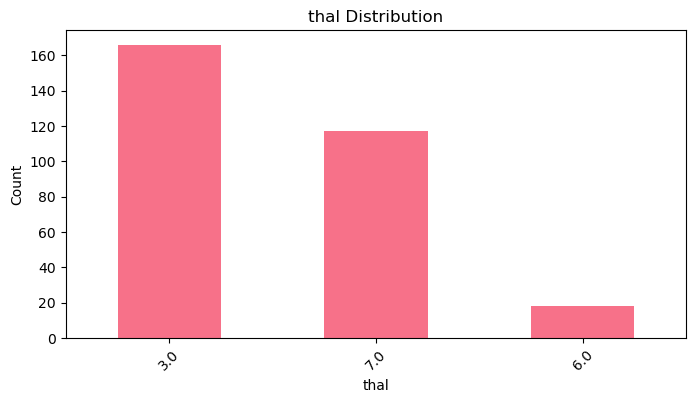


ca value counts:
0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


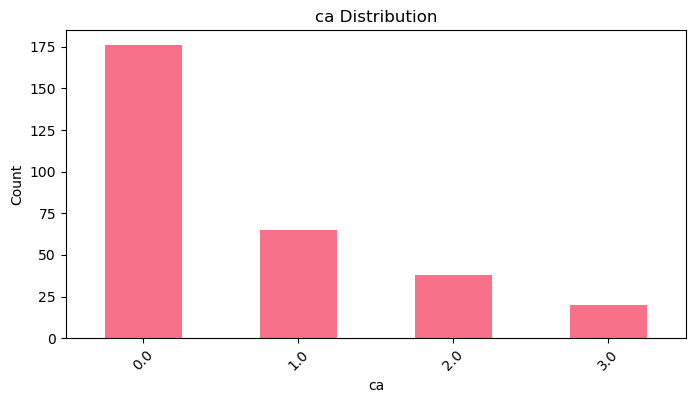


num value counts:
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


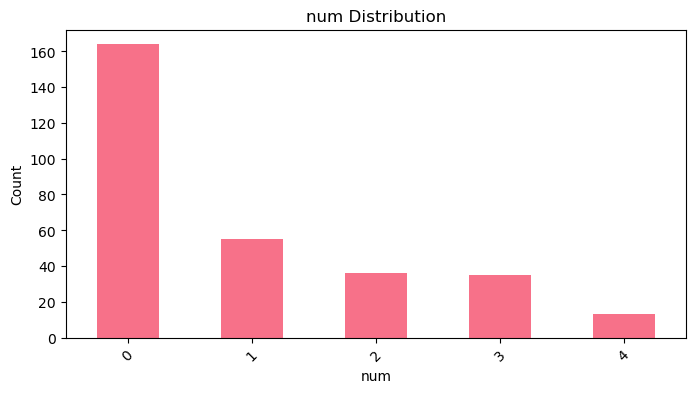

In [34]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num']
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CORRELATION ANALYSIS ===


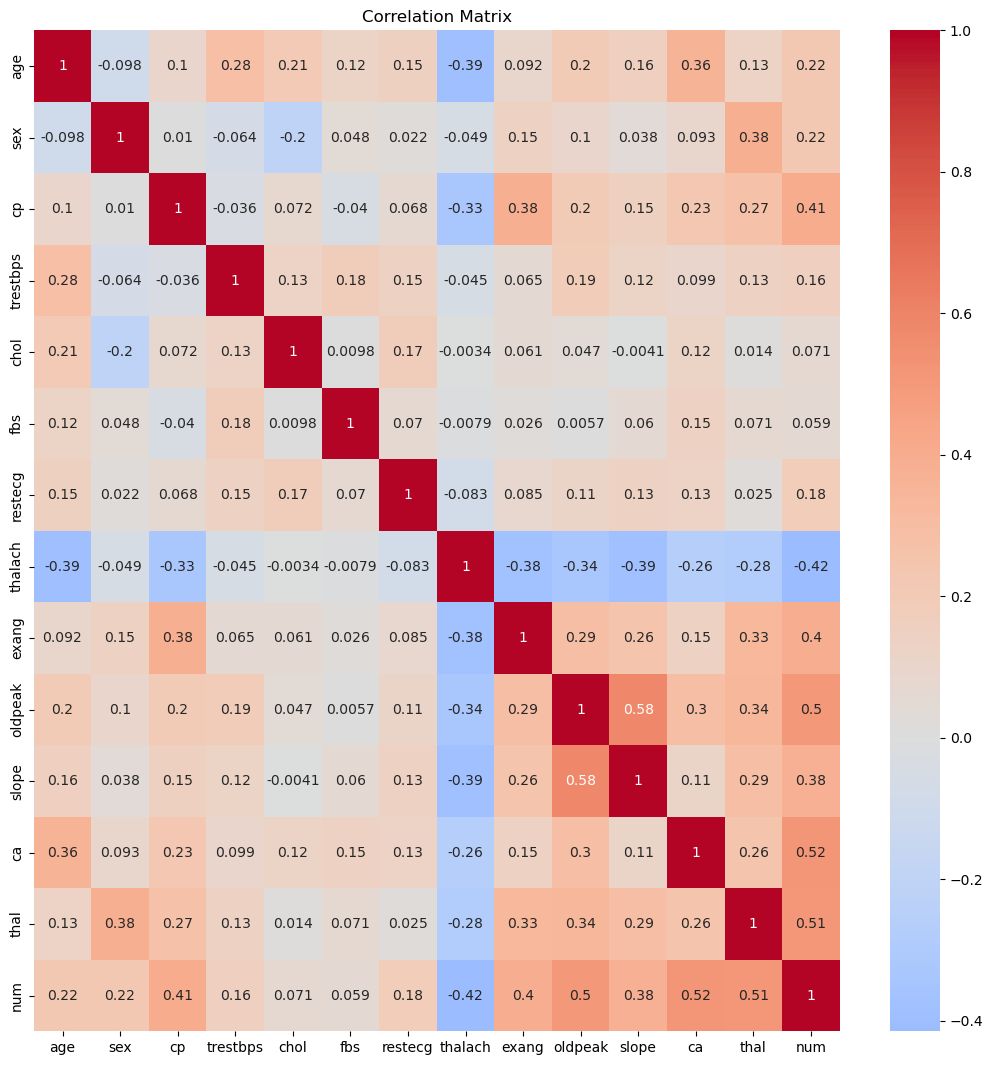

In [35]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


The correlation heatmap shows that the target variable correlates most strongly with the number of vessels (`ca`), with a positive correlation of 0.52. It is also positively correlated with thalassemia type (`thal`), with a correlation of 0.51, and ST depression (`oldpeak`), with a correlation of 0.50.


=== RELATIONSHIPS WITH TARGET ===


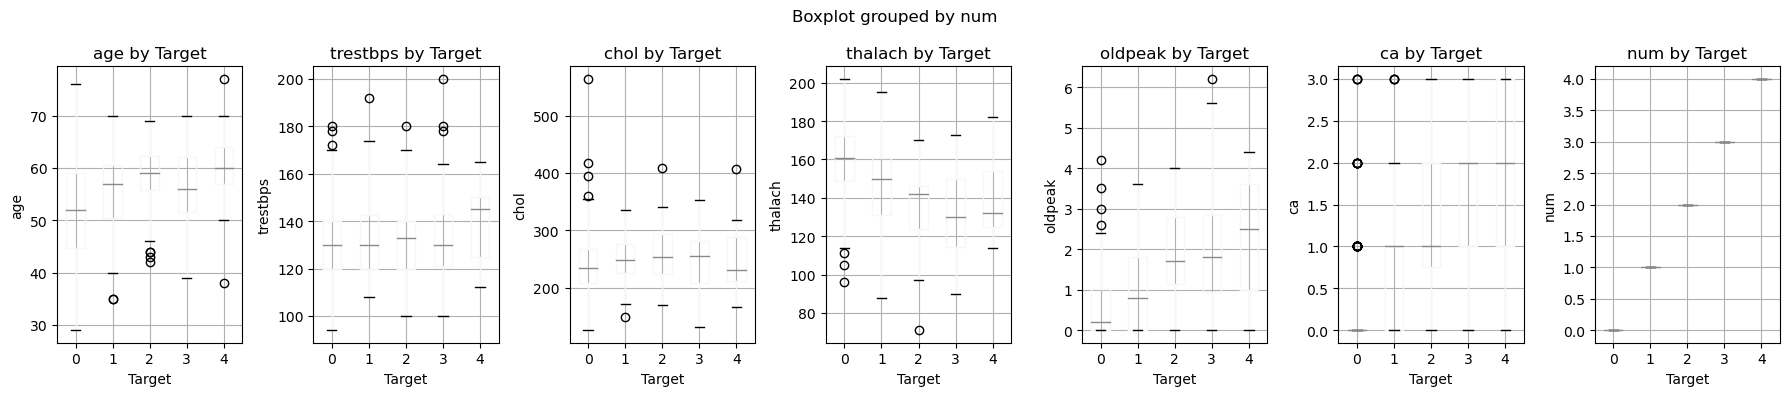


sex vs Target:
num      0      1      2      3      4
sex                                   
0    0.742  0.093  0.072  0.072  0.021
1    0.447  0.223  0.141  0.136  0.053

cp vs Target:
num      0      1      2      3      4
cp                                    
1    0.696  0.217  0.043  0.000  0.043
2    0.820  0.120  0.020  0.040  0.000
3    0.791  0.105  0.047  0.047  0.012
4    0.271  0.243  0.208  0.201  0.076

fbs vs Target:
num      0      1      2      3      4
fbs                                   
0    0.547  0.198  0.105  0.105  0.047
1    0.511  0.089  0.200  0.178  0.022

restecg vs Target:
num          0      1      2      3      4
restecg                                   
0        0.629  0.152  0.126  0.079  0.013
1        0.250  0.000  0.250  0.250  0.250
2        0.459  0.216  0.108  0.149  0.068

exang vs Target:
num        0      1      2      3      4
exang                                   
0      0.691  0.147  0.069  0.059  0.034
1      0.232  0.253  0.222  0.2

In [36]:
import math
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num']


if len(numerical_cols_no_target) > 0:
    n = len(numerical_cols_no_target)
    ncols = 3
    nrows = math.ceil(n/ncols)
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(6*ncols, 4 ))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='num', ax=axes[i])
        axes[i].set_title(f'{col} by Target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Target:")
    crosstab = pd.crosstab(df[col], df['num'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: [Your first hypothesis]
**H1:** Individuals with higher number of major vessels are more likely to have severe heart disease.
- **Null Hypothesis (H0):** There is no relationship between number of major vessles and the severity of heart disease.
- **Alternative Hypothesis (H1):** There is a positive relationship between the number of major vessles and the severity of heart disease.
- **Rationale:** The variable 'ca' has the strongest positive correlation with 'num' with a value of 0.52, indicating that as the number of major vessels increases, the likelihood of severe heart disease also increases.

### Hypothesis 3: [Your second hypothesis]
**H2:** Individuals with higher thalassemia test results are more likely to have severe heat disease. 
- **Null Hypothesis (H0):** There is no relationship between thalassemia test results and the severity of heart disease. 
- **Alternative Hypothesis (H1):** There is a positive relationship between thalasseia test result and the severity of heart disease. 
- **Rationale:** The variable 'thal' has a high positive correlation with 'num' with a value of 0.51. indicating that higher thalassemia test results are associated with a higher likelihood of severe heart disease. 

### Hypothesis 3: [Your third hypothesis - optional]
**H3:** Individuals with greater ST depression (induced by excercise relative to rest) are more likely to have severe heart disease. 
- **Null Hypothesis (H0):** There is no relationship between ST depression and the severity of heart disease.
- **Alternative Hypothesis (H1):** There is a positive relationship between ST depression and the severity of heart disease. 
- **Rationale:** The variable 'oldpeak' has a positive correlation with 'num' with a value of 0.50, indicating that greater ST depression during exercise increases the likelihood of severe heart disease.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Your first hypothesis]

**Test Choice:** Chi-square test
- **Why appropriate:** We can determine if there is a significant relationship between the two categorical variables.


In [37]:

# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

clean_df = df[['ca', 'num']].dropna()

contingency_table = pd.crosstab(df['ca'], df['num'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value}")
# 
if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")


=== TESTING HYPOTHESIS 1 ===
Chi-square statistic: 109.9215
p-value: 6.201868931513594e-18
Reject H0: Variables are significantly associated


### Testing Hypothesis 2: [Your second hypothesis]

**Test Choice:** ANOVA (analysis of variance) test
- **Why appropriate:** We can test the significance between multiple independent variables (normal, fixed defect, and reversable defect) with the dependent variable. 


In [38]:
print("=== TESTING HYPOTHESIS 2 ===")

clean_df = df[['thal', 'num']].dropna()

groups =[]

for val in clean_df['thal'].unique():
    group = clean_df[clean_df['thal'] == val]['num']
    groups.append(group)
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else: 
    print("Fail to Reject H0: No significant association")


=== TESTING HYPOTHESIS 2 ===
F-statistic: 52.4713
p-value: 2.9991429880381093e-20
Reject H0: Variables are significantly associated


### Testing Hypothesis 3: [Your third hypothesis - if applicable]

**Test Choice:** Spearman correlation 
- **Why appropriate:** We can test the strength and the direction of the monotonic relationship.


In [39]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

from scipy.stats import spearmanr


clean_df = df[['oldpeak', 'num']].dropna()

corr, p_value = spearmanr(clean_df['oldpeak'], clean_df['num'])
print(f"Spearman correlation: {corr:.4f}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to Reject H0: No significant association")


=== TESTING HYPOTHESIS 3 ===
Spearman correlation: 0.4630
p-value: 1.657777151209465e-17
Reject H0: Variables are significantly associated


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Most individuals have no or only mild heart disease, while fewer fall into the severe range.
2. Higher values of oldpeak (ST depression), ca (number of major vessels), and thal (thalassemia) are all associated with increased heart disease severity. In contrast, thalach (maximum heart rate achieved) shows a negative correlation with the target variable.
3. The p-values for these three features are very small, indicating that they are statistically significant and have strong relationships with heart disease severity.
4. Males show a higher frequency of heart disease compared to females.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Chi-square test | 6.201868931513594e-18 | Significant | As the number of major vessels colored by fluoroscopy increases, the chance of having severe heart disease also increases. |
| **H2** | ANOVA | 2.9991429880381093e-20 | Significant | Individuals with higher thalassemia test tends to have more severe heart disease.  |
| **H3** | Spearman correlation | 1.657777151209465e-17 | Significant | Higher ST depression during exercise leads to higher likelihood of heart disease.|

### Key Insights:
- The variables (ca, thal, and oldpeak) had the strongest relationship with the severity of heart disease.
- These variables can be strong predictors when assessing a patient’s risk of heart disease.
- The dataset is not large, so the results cannot be assumed for all cases and should not be generalized to all populations.
- The dataset is limited to clinical and physiological features, which restricts the scope of prediction.


### Future Research:
- Collecting additional data, such as exercise frequency and diet, could provide a more accurate understanding of heart disease risk.
- Machine learning models could be applied for more advanced analysis such as using tree-based models to identify feature importance. 

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [40]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Your dataset name]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [Your dataset name]
Sample size: 303 observations
Number of features: 13 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
